In [1]:
import os
import shutil
import subprocess 
import itertools
import numpy as np

import mlflow
from random import random, randint
from mlflow import log_metric, log_param, log_artifact, log_artifacts


In [10]:

mlflow.set_experiment("selection-4-o2")

<Experiment: artifact_location='file:///files0/extended/bohm747/Development/soda/soda-opt/experiments/selection/mlruns/4', experiment_id='4', lifecycle_stage='active', name='selection-4-o2', tags={}>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

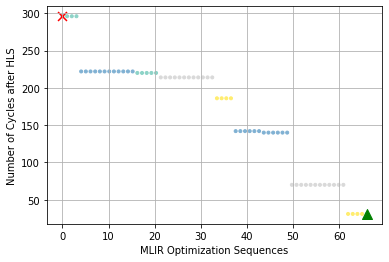

In [93]:

runs = mlflow.search_runs('3')
runs['label']=[v.count('-affine-loop-unroll') for v in runs['params.sodaopt_string']]

plt.figure()
df=runs.sort_values(by='metrics.cycles', ascending=False)[['metrics.cycles','label']]


v=df['metrics.cycles'].values
x=np.linspace(0,len(v), len(v))
plt.scatter(x, v, marker='.', c=df.label, cmap='Set3')
# plt.scatter(x, v, marker='.', c='black')
plt.xlabel("MLIR Optimization Sequences")
plt.ylabel("Number of Cycles after HLS")
plt.scatter([0], [v[0]], color='red', marker='x', s=80)
plt.scatter([66], [v[-1]], color='green', marker='^', s=100)
plt.grid(True)
plt.savefig('dse-gemm4.pdf') 
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


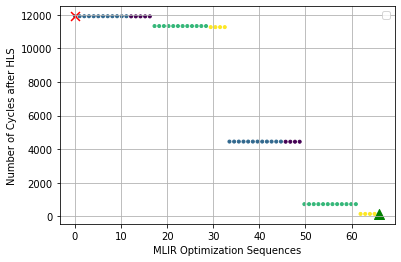

In [110]:
runs = mlflow.search_runs('5')
runs['label']=[v.count('-affine-loop-unroll') for v in runs['params.sodaopt_string']]

fig, ax = plt.subplots()
df=runs.sort_values(by='metrics.cycles', ascending=False)[['metrics.cycles','label']]


v=df['metrics.cycles'].values
x=np.linspace(0,len(v), len(v))
ax.scatter(x, v, marker='.', c=df.label )
# plt.scatter(x, v, marker='.', c='black')
plt.xlabel("MLIR Optimization Sequences")
plt.ylabel("Number of Cycles after HLS")
ax.scatter([0], [v[0]], color='red', marker='x', s=80)
ax.scatter([66], [v[-1]], color='green', marker='^', s=100)
ax.grid(True)
plt.savefig('dse-gemm8.pdf') 
plt.show()

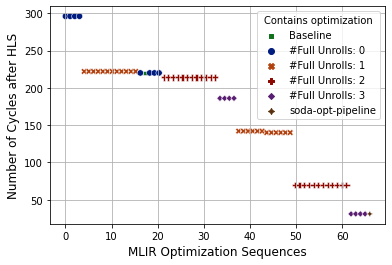

In [204]:
import seaborn as sns

runs = mlflow.search_runs('3')

label='Contains optimization'
runs[label]=['#Full Unrolls: {}'.format(v.count('-affine-loop-unroll')) for v in runs['params.sodaopt_string']]
runs.at[runs.loc[runs['params.sodaopt_string'].str.contains('lower-all')][label].index[0], label]='Baseline'
runs.at[runs.loc[runs['params.sodaopt_string'].str.contains('soda-opt-pipeline')][label].index[0], label]='soda-opt-pipeline'


fig, ax = plt.subplots()
df=runs.sort_values(by='metrics.cycles', ascending=False)[['metrics.cycles',label]]
sns.scatterplot(data=df, x=x, y='metrics.cycles', style=label, hue=label, s=40, palette='dark')
ax.grid()
handles, labels = ax.get_legend_handles_labels()
myorder = [2, 0, 1, 3, 4, 5]
labels = [labels[i] for i in myorder]
handles = [handles[i] for i in myorder]

ax.legend(handles, labels, title='Contains optimization', loc='upper right')
plt.xlabel("MLIR Optimization Sequences", fontsize=12)
plt.ylabel("Number of Cycles after HLS",fontsize=12)
plt.savefig('dse-gemm4.pdf') 
plt.show()

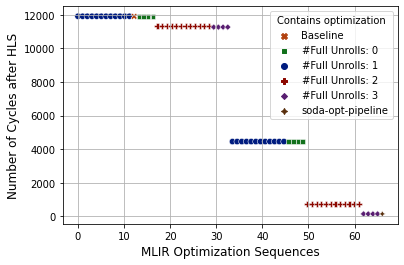

In [206]:
import seaborn as sns

runs = mlflow.search_runs('5')

label='Contains optimization'
runs[label]=['#Full Unrolls: {}'.format(v.count('-affine-loop-unroll')) for v in runs['params.sodaopt_string']]
runs.at[runs.loc[runs['params.sodaopt_string'].str.contains('lower-all')][label].index[0], label]='Baseline'
runs.at[runs.loc[runs['params.sodaopt_string'].str.contains('soda-opt-pipeline')][label].index[0], label]='soda-opt-pipeline'


fig, ax = plt.subplots()
df=runs.sort_values(by='metrics.cycles', ascending=False)[['metrics.cycles',label]]
sns.scatterplot(data=df, x=x, y='metrics.cycles', style=label, hue=label, s=40, palette='dark')
ax.grid()
handles, labels = ax.get_legend_handles_labels()
myorder = [1, 2, 0, 3, 4, 5]
labels = [labels[i] for i in myorder]
handles = [handles[i] for i in myorder]

ax.legend(handles, labels, title='Contains optimization', loc='upper right')
plt.xlabel("MLIR Optimization Sequences", fontsize=12)
plt.ylabel("Number of Cycles after HLS",fontsize=12)
plt.savefig('dse-gemm8.pdf') 
plt.show()

In [167]:
myorder = [2, 0, 1, 3, 4]
labels = [labels[i] for i in myorder]


['#Full Unrolls: 1',
 'Baseline',
 '#Full Unrolls: 0',
 '#Full Unrolls: 2',
 '#Full Unrolls: 3',
 'soda-opt-pipeline']

In [153]:
runs.at[runs.loc[runs['params.sodaopt_string'].str.contains('lower-all')]['label'].index[0], 'label']='Baseline'
runs[runs['params.sodaopt_string'].str.contains('Baseline')]

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.cycles,params.sodaopt_string,params.bambu_string,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.LOG_STATUS,label


In [155]:
runs.loc[runs['params.sodaopt_string'].str.contains('lower-all')]

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.cycles,params.sodaopt_string,params.bambu_string,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.LOG_STATUS,label
64,8b581a5212954bb7a93b5c1b11ea9b94,5,FINISHED,file:///files0/extended/bohm747/Development/so...,2022-03-30 20:29:59.229000+00:00,2022-03-30 20:30:10.343000+00:00,11914.0,"soda-opt -lower-all-to-llvm=""use-bare-ptr-memr...",bambu -v3 --print-dot -lm --soft-float --compi...,bohm747,LOCAL,/home/bohm747/miniconda3/envs/tf-nb/lib/python...,SUCCESS,Baseline
